In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import string
import nltk
import csv

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#nltk.download('stopwords')

In [2]:
############# Convert txt file to csv ##############

#Positive tweets
headers = ['Tweet','Sentiment']
df = pd.read_fwf('Datasets/PosTweetsSample.txt', header = None)
df['new_column'] = '1'
df.to_csv('Datasets/PosTweetsSample.csv', header = headers, index = False)

#Negative tweets
df = pd.read_fwf('Datasets/NegTweetsSample.txt', header = None)
df['new_column'] = '-1'
df.to_csv('Datasets/NegTweetsSample.csv', header = None, index = False)


############### Combining Both Files Together ###############

PosReader = csv.reader(open("Datasets/PosTweetsSample.csv"))
NegReader = csv.reader(open("Datasets/NegTweetsSample.csv"))
f = open("Datasets/TweetsSample.csv", "w")
writer = csv.writer(f)

for row in PosReader:
    writer.writerow(row)
for row in NegReader:
    writer.writerow(row)
f.close()

In [6]:
from sklearn.model_selection import train_test_split

data = pd.DataFrame()
data = pd.read_csv('Datasets/TweetsSample.csv', encoding = 'utf-8')
data.head()

# Splitting the data into train and test set
train,test = train_test_split(data, test_size=0.30, random_state=0)

#save the data
train.to_csv('Datasets/Train/TrainSample.csv',index=False)
test.to_csv('Datasets/Test/TestSample.csv',index=False)

In [14]:
data = pd.DataFrame()
data = pd.read_csv('Datasets/Train/TrainSample.csv', encoding = 'utf-8')
data.head()


,Tweet,Sentiment
0,<user> leeds vs assignments love your prioriti...,1
1,<user> oh no ! tell them you are niall horan's...,1
2,<user> so vb pkul 11.30 kan ? . anyway thanks mar,1
3,wahh why wont my phone send texts,-1
4,"<user> you have a beautiful voice , handsome f...",-1


In [15]:
print(data.shape)

(140000, 2)


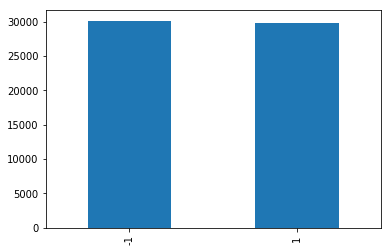

In [13]:
# to see the distribution of the sentiments of the data

%matplotlib inline

data['Sentiment'].value_counts().plot(kind='bar')

In [5]:
#create empty list
tweet_data_list = []

indv_lines = data['Tweet'].values.tolist()
for line in indv_lines:
    
    #create word tokens as well as remove punctuation in one go
    rem_tok_punc = RegexpTokenizer(r'\w+')
    
    tokens = rem_tok_punc.tokenize(line)
    
    #convert the words to lower case
    words = [w.lower() for w in tokens]
    
    #invoke all the English stopwords
    stop_word_list = set(stopwords.words('english'))
    
    #remove stop words
    words = [w for w in words if not w in stop_word_list]
    
    #remove <user> and <url>
    useless = ['user', 'url']
    words = [w for w in words if not w in useless]
    
    #append words in the tweet_data_list list
    tweet_data_list.append(words)

In [6]:
print(len(tweet_data_list))

2499998


In [7]:
from gensim.models import Word2Vec

EmbeddingDim = 100

#train Word2Vec model
model = Word2Vec(sentences = tweet_data_list, size = EmbeddingDim, workers = 4, min_count = 1)

In [8]:
#Finding similar words
model.wv.most_similar('happy')

[('happpy', 0.6564756035804749),
 ('oniii', 0.6490100622177124),
 ('hapy', 0.6392120718955994),
 ('happyyy', 0.6362848281860352),
 ('derrons', 0.6203317642211914),
 ('happyy', 0.6147671937942505),
 ('thankgyu', 0.5993133187294006),
 ('haaappy', 0.5991760492324829),
 ('haapppy', 0.5943557024002075),
 ('jimmychanga', 0.5919551253318787)]

In [9]:
#Performing some mathematics on word vectors queen + man - woman = ?
model.wv.most_similar_cosmul(positive=['queen','man'], negative=['woman'])

[('king', 0.8442425727844238),
 ('srching', 0.8393368124961853),
 ('jiggaboo', 0.833990216255188),
 ('afterjesusofcourse', 0.8194261193275452),
 ('eustis', 0.8174663186073303),
 ('wayrt', 0.8172970414161682),
 ('lion', 0.8038962483406067),
 ('somehero', 0.8015486001968384),
 ('stubbs', 0.794025182723999),
 ('nominateerikforpromking', 0.7926875352859497)]

In [19]:
#Finding the odd word out from the list of words given
print(model.wv.doesnt_match("england switzerland france germany cheese".split()))

cheese


In [13]:
# Importing bokeh libraries for showing how words of similar context are grouped together
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [14]:
VocabKeys = []
for key in model.wv.vocab.keys():
    VocabKeys.append(key)


#Defining the chart
output_notebook()
plot_chart = bp.figure(plot_width=700, plot_height=600, title="A Plot of 5000 Word Vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

#Extracting the list of word vectors, limiting to 5000, each is of 200 dimensions
word_vectors = [model[w] for w in VocabKeys[:5000]]

Loading BokehJS ...

/Users/victoriaadcock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


# Reducing dimensionality by converting the vectors to 2d vectors

In [15]:
######### TSNE ##########

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# Storing data in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = VocabKeys[:5000]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.025s...
[t-SNE] Computed neighbors for 5000 samples in 4.288s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.146886
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.895233
[t-SNE] KL divergence after 1000 iterations: 2.189746


In [17]:
# Corresponding word appears when you hover on the data point.
plot_chart.scatter(x='x', y='y', source=tsne_df)
hover = plot_chart.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_chart)

In [56]:
######### PCA ##########

from sklearn.decomposition import PCA

pca_model = PCA(n_components=2, random_state=0)
pca_w2v = pca_model.fit_transform(word_vectors)

# Storing data in a dataframe
pca_df = pd.DataFrame(pca_w2v, columns=['x', 'y'])
pca_df['words'] = VocabKeys[:5000]


In [57]:
# Corresponding word appears when you hover on the data point.
plot_chart.scatter(x='x', y='y', source=pca_df)
hover = plot_chart.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_chart)

In [27]:
#Save word embedding model
model_file = 'Embeddings/prac_embedding.txt'
model.wv.save_word2vec_format(model_file, binary=False)

# Classifying Practise

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [25]:
lr = LogisticRegression(penalty='l2', C=.8, random_state=21)

text_classifier = Pipeline([
    ('vectorizer', CountVectorizer(binary=False, stop_words='english', ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', lr),
#     ('clf', SGDClassifier()), #by default, this is SVM
])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.Tweet, data.Sentiment, test_size=0.35, random_state=4)

text_classifier.fit(X_train, y_train)

/Users/victoriaadcock/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ..., penalty='l2', random_state=21, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [27]:
predicted_test = text_classifier.predict(X_test)
predicted_proba_test = text_classifier.predict_proba(X_test)

In [39]:
from sklearn import metrics

predicted_train = text_classifier.predict(X_train)

y_train = y_train.astype('category')
print(metrics.classification_report(y_train, predicted_train,
    labels=y_train.cat.categories.tolist()))


              precision    recall  f1-score   support

          -1       0.89      0.86      0.88     65073
           1       0.87      0.90      0.88     64925

   micro avg       0.88      0.88      0.88    129998
   macro avg       0.88      0.88      0.88    129998
weighted avg       0.88      0.88      0.88    129998



In [43]:
ConMatTrain=metrics.confusion_matrix(y_train, predicted_train)
TrainAccuracy = (ConMatTrain[0,0] + ConMatTrain[1,1]) / (ConMatTrain[0,0] + ConMatTrain[1,1] + ConMatTrain[0,1] + ConMatTrain[1,0])

print(ConMatTrain)
print(f'Accuracy = {TrainAccuracy:.2f}')

[[56016  9057]
 [ 6729 58196]]
Accuracy = 0.88


In [44]:
predicted_test = text_classifier.predict(X_test)

y_test = y_test.astype('category')
print(metrics.classification_report(y_test, predicted_test,
    labels=y_test.cat.categories.tolist()))

              precision    recall  f1-score   support

          -1       0.81      0.77      0.79     34926
           1       0.78      0.82      0.80     35074

   micro avg       0.80      0.80      0.80     70000
   macro avg       0.80      0.80      0.80     70000
weighted avg       0.80      0.80      0.80     70000



In [45]:
ConMatTest = metrics.confusion_matrix(y_test, predicted_test)
TestAccuracy = (ConMatTest[0,0] + ConMatTest[1,1]) / (ConMatTest[0,0] + ConMatTest[1,1] + ConMatTest[0,1] + ConMatTest[1,0])

print(ConMatTest)
print(f'Accuracy = {TestAccuracy:.2f}')

[[26990  7936]
 [ 6282 28792]]
Accuracy = 0.80


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from TextToTensor import TextToTensor
from RNN_model import * 
from embeddings_matrix import *

data = pd.DataFrame()
data = pd.read_csv('Datasets/Smaller Datasets/Train.csv', encoding = 'utf-8')
data.head()

X_train, X_test, y_train, y_test = train_test_split(data.Tweet, data.Sentiment, test_size=0.35, random_state=4)

In [ ]:
embed_path = 'Embeddings/practise_embedding.txt'
embed_dim = 100 # must be same size as the embedding dimension 


# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
num_unique_words = len(tokenizer.word_index)

# Creating the embedding matrix
embedding = Embeddings(embed_path, embed_dim)
embedding_matrix = embedding.create_embedding_matrix(tokenizer, len(tokenizer.word_counts))

# Getting the biggest sentence
max_len = np.max([len(text.split()) for text in X_train])

# Converting to tensor
TextToTensor_instance = TextToTensor(tokenizer=tokenizer,max_len=max_len)
X_train_NN = TextToTensor_instance.string_to_tensor(X_train)


model = Sequential()
model.add(Embedding(input_dim=num_unique_words+1, output_dim=embed_dim, input_length=max_len,weights=[embedding_matrix]))

model.compile('rmsprop', 'mse')
output_array = model.predict(X_train_NN)[0]



results = Pipeline( X_train=X_train, Y_train=y_train, embed_path=embed_path, embed_dim=embed_dim, X_test=X_test, Y_test= y_test, epochs=1, batch_size=256)

114/508 [=====>........................] - ETA: 7:06 - loss: -23.0674

In [3]:
#TextToTensor_instance = TextToTensor(tokenizer=results.tokenizer,max_len=max_len)

data = pd.DataFrame()
data = pd.read_csv('Datasets/Smaller Datasets/Train.csv', encoding = 'utf-8')
data.head()

X_train, X_test, y_train, y_test = train_test_split(data.Tweet, data.Sentiment, test_size=0.35, random_state=4)


print(X_train)

154312                                   shower then school
114995          <user> top weezy fan ? ps , where are you ?
150797    my legs , my ankle swollen from jumping life o...
29631     <user> <user> goodluck for the finals tomorrow...
130646                       <user> oh damn wish i could go
80848     <user> he has good stuff ? give him my number ...
7700                         ah . i'm loving this weather .
159935    <user> <user> i forgot to save her number #dol...
17502                        life is just perfect right now
32328     <user> thats good i'm from australia what abou...
194654    in environmental science outside trying to cat...
91170     how to be followed by me : 1 ) rt this tweet 2...
168300              ugh it's really hard thaa we dnt talk (
181043    03x34 custom picture frame / poster frame 1.5 ...
155341    facade : musings on living life and coping wit...
99550     <user> too slow mate , but you're number got i...
117165    24 faubourg perfume for women 

In [21]:
data = pd.DataFrame()
data = pd.read_csv('Datasets/Prac.csv', encoding = 'utf-8')
data.head()



from sklearn.model_selection import train_test_split
#split the data into train and test set
train,test = train_test_split(data, test_size=0.30, random_state=0)
#save the data
train.to_csv('Datasets/PracTrain.csv',index=False)
test.to_csv('Datasets/PracTest.csv',index=False)